In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train, X_test = X_train / 255.0, X_test / 255.0

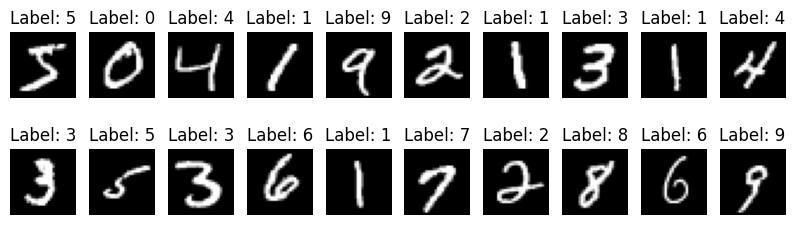

In [11]:
plt.figure(figsize=(10,15))

for i in range(20):  # Display first 10 images
    plt.subplot(10, 10, i + 1)
    plt.imshow(X_train[i], cmap='gray')  # Display in grayscale
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.show()

In [12]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),  
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),  
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dense(10, activation='softmax')  
])

D:\Sem - 6\Minor 2\env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
model.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=10, validation_data=(X_test.reshape(-1, 28, 28, 1), y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9093 - loss: 0.2943 - val_accuracy: 0.9824 - val_loss: 0.0529
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9865 - loss: 0.0424 - val_accuracy: 0.9897 - val_loss: 0.0334
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9906 - loss: 0.0300 - val_accuracy: 0.9891 - val_loss: 0.0377
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9944 - loss: 0.0192 - val_accuracy: 0.9909 - val_loss: 0.0275
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9960 - loss: 0.0129 - val_accuracy: 0.9909 - val_loss: 0.0303
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9966 - loss: 0.0110 - val_accuracy: 0.9907 - val_loss: 0.0311
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9969 - loss: 0.0103 - val_accuracy: 0.9905 - val_loss: 0.0345
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9979 - loss: 0

In [15]:
test_loss, test_acc = model.evaluate(X_test.reshape(-1, 28, 28, 1), y_test)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9848 - loss: 0.0599 

Test Accuracy: 98.91%


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 675,104 (2.58 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 450,070 (1.72 MB)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test.reshape(-1, 28, 28, 1))
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  


In [19]:
accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy: {accuracy}')

precision = precision_score(y_test, y_pred_classes, average='macro')
print(f'Precision: {precision}')

recall = recall_score(y_test, y_pred_classes, average='macro')
print(f'Recall: {recall}')

f1 = f1_score(y_test, y_pred_classes, average='macro')
print(f'F1 Score: {f1}')

Accuracy: 0.9891
Precision: 0.9890084378910731
Recall: 0.9890392032207173
F1 Score: 0.9889957632951815


In [20]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))

Confusion Matrix:
[[ 973    0    1    1    0    1    1    1    2    0]
 [   0 1129    2    1    0    1    0    0    2    0]
 [   1    0 1018    5    0    0    1    7    0    0]
 [   0    0    1 1006    0    2    0    1    0    0]
 [   0    0    1    1  972    0    4    0    1    3]
 [   0    0    0    7    0  884    1    0    0    0]
 [   2    2    0    0    1    8  944    0    1    0]
 [   0    3    5    1    0    1    0 1017    1    0]
 [   0    0    4    5    0    1    0    2  960    2]
 [   0    0    0    6    6    8    0    1    0  988]]


In [21]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.97      1.00      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [23]:
model.save("digit_recognition_model.h5")